#Hoja de trabajo #1 - Norman Vicente

## Problema I


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [32]:
def setColor(img, color):
  
  alto = img.shape[0]
  ancho = img.shape[1]
  imgSalida = np.zeros((alto, ancho, 3))
  blue = []
  green = []
  red = []
  colors = []

  for i in range(0, alto):
    for j in range(0, ancho):
      pixel = img[i, j]
      blue = pixel[2]
      green = pixel[1]
      red = pixel[0]

      if color==1:
        imgSalida[i, j] = [0,0,blue]
      if color == 2:
        imgSalida[i, j] = [0,green,0]
      if color==3:
        imgSalida[i, j] = [red,0,0]
      if color == 10:
        imgSalida[i, j] = [red,green,0]
      if color ==20:
        imgSalida[i, j] = [0,green,blue]
      if color ==30:
        imgSalida[i, j] = [red, 0, blue]

  plt.imshow(imgSalida)

#### Salida

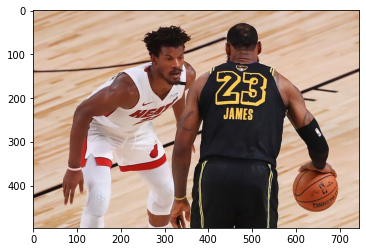

In [17]:
imagen = cv2.imread('img_ej1.jpeg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


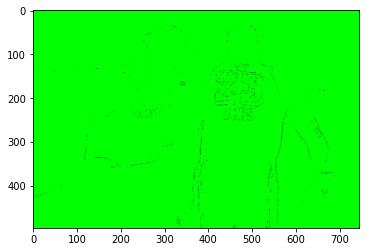

In [33]:
setColor(imagen, 2)

## Problema II

In [73]:
def printImage(img):
  image1 = cv2.imread(img)
  plt.imshow(imagen)

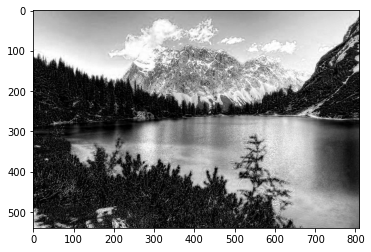

In [75]:
printImage("1.jpg")

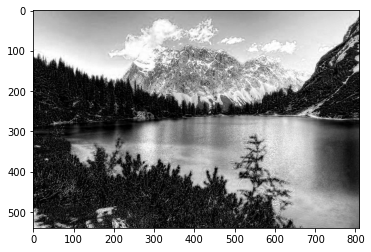

In [76]:
printImage("2.jpg")

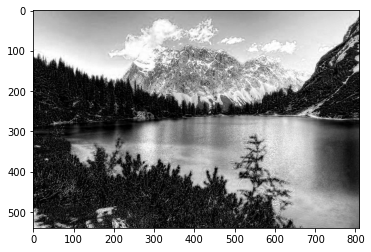

In [77]:
printImage("3.jpg")

In [88]:
def mergeColors(img1, img2, img3):

  gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
  gray3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

  merge_img = cv2.merge([gray2,gray3,gray1])

  plt.imshow(merge_img)

#### Salida

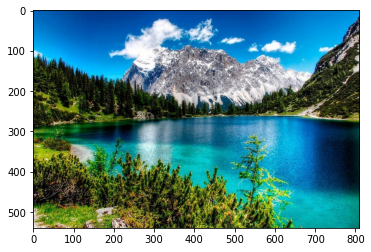

In [72]:
image1 = cv2.imread('1.jpg')
image2 = cv2.imread('2.jpg')
image3 = cv2.imread('3.jpg')
mergeColors(image1, image2, image3)

## Problema III

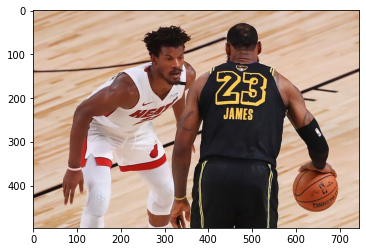

In [79]:
imagen = cv2.imread('img_ej1.jpeg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)

In [84]:
def grayScaleImages(img):
  alto = img.shape[0]
  ancho = img.shape[1]
  gray_green = np.zeros((alto, ancho, 1))
  gray_blue = np.zeros((alto, ancho, 1))
  gray_red = np.zeros((alto, ancho, 1))

  for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
  return gray_red, gray_blue, gray_green

def showImage(strimg, arr):
    cv2.imwrite(strimg, arr)
    imgTemp = cv2.imread(strimg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

#### Salida

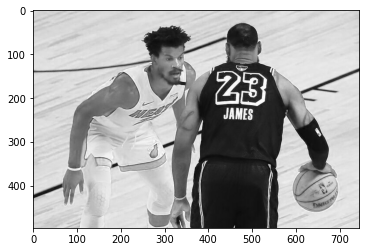

In [85]:
(red, blue, green) = grayScaleImages(imagen)
showImage("red.jpg", red)

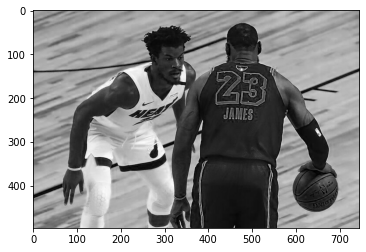

In [87]:
showImage("blue.jpg", blue)

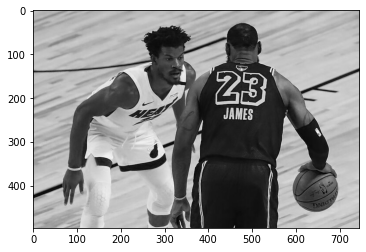

In [86]:
showImage("green.jpg", green)

## Problema IV

In [130]:
def histImage(img):
  img = cv2.imread(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  alto = img.shape[0]
  ancho = img.shape[1]

  ecualizada = np.zeros((alto, ancho, 1))
  frecuencias = np.zeros((256))

  for i in range(0, alto):
    for j in range(0, ancho):
        pixel = gray[i, j]
        frecuencias[pixel] = frecuencias[pixel] + 1

  densidad = np.true_divide(frecuencias, (ancho*alto))
  cdf = np.cumsum(densidad, dtype=float)

  for i in range(0, alto):
    for j in range(0, ancho):
        pixel = gray[i, j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
  return gray_red, gray_blue, gray_green

In [ ]:
(red, blue, green) = histImage('perro.jpg')

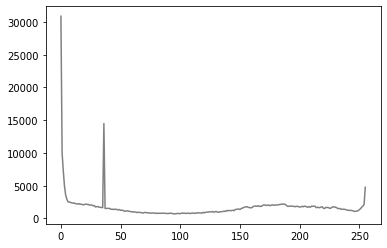

In [127]:
histOriginal = cv2.calcHist([gray], [0], None, [256], [0,256])
plt.plot(histOriginal, color="gray")

##Problema V

La escala de gris ponderada se usa  debido a la respuesta del ojo al espectro visible la cual se puede observar la imagen

In [140]:
def grisPonderado(img):
  img = cv2.imread(img)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  alto = img.shape[0]
  ancho = img.shape[1]
  gray_ponderado = np.zeros((alto, ancho, 1))
  for i in range(0, alto):
    for j in range(0, ancho):
        pixel = img[i,j]
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])
  return gray_ponderado

In [141]:
ponderado = grisPonderado('perro.jpg')

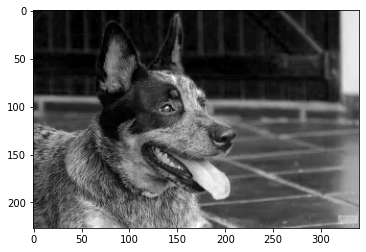

In [143]:
showImage("blue.jpg", ponderado)

## Problema VI

### HSB

Define un modelo de color en términos de sus componentes, Se trata de una transformación no lineal del espacio de color RGB, y se puede usar en progresiones de color.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f1/HSV_cone.jpg/220px-HSV_cone.jpg" />

Se representa como un grado de ángulo cuyos valores posibles van de 0 a 360° (aunque para algunas aplicaciones se normalizan del 0 al 100%). Cada valor corresponde a un color. Ejemplos: 0 es rojo, 60 es amarillo y 120 es verde.
